# Fealpy 中的网格

网格是进行有限元计算的基础，本文档介绍 Fealpy 中网格的数据结构，生成算法及可视化。

## 三角形网格的数据结构

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from fealpy.mesh.TriangleMesh import TriangleMesh
%matplotlib inline

In [2]:
# 网格顶点坐标数组
point = np.array([
    (0, 0), 
    (1, 0), 
    (1, 1),
    (0, 1)], dtype=np.float)
# 单元顶点编号数组
cell = np.array([
    (1, 2, 0), 
    (3, 0, 2)], dtype=np.int)

tmesh = TriangleMesh(point, cell) # 三角形网格实例
tmesh.point
tmesh.ds.edge
tmesh.ds.cell
tmesh.ds.edge2cell
tmesh.ds.cell_to_edge()

array([[1, 0, 3],
       [1, 4, 2]])

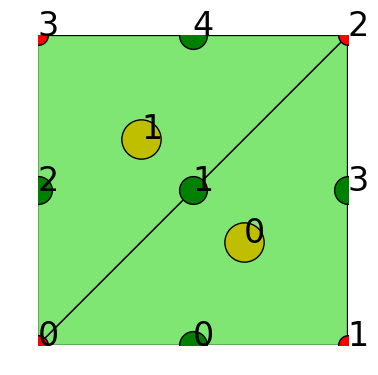

In [3]:
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
tmesh.find_point(axes, showindex=True)
tmesh.find_edge(axes, showindex=True)
tmesh.find_cell(axes, showindex=True)
plt.show()

## 网格生成

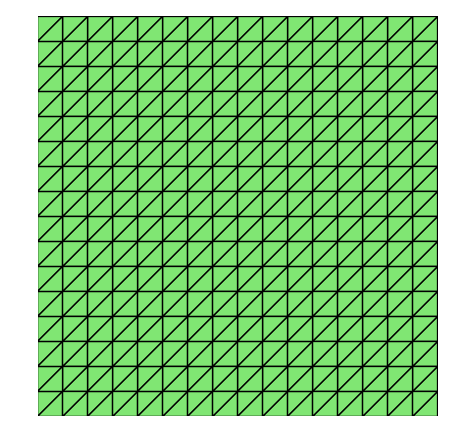

In [8]:
from fealpy.mesh.simple_mesh_generator import squaremesh
tmesh = squaremesh(0, 1, 0, 1, r=4)
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.savefig('/home/why/squaremeshd4.pdf')
plt.show()

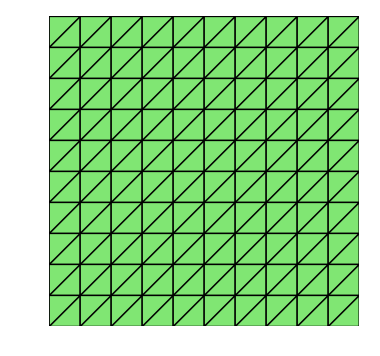

In [5]:
from fealpy.mesh.simple_mesh_generator import rectangledomainmesh
box = [-1, 1, -1, 1]
# the meshtype can be tri, quad, polygon
mesh = rectangledomainmesh(box, nx=10, ny=10, meshtype='tri')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

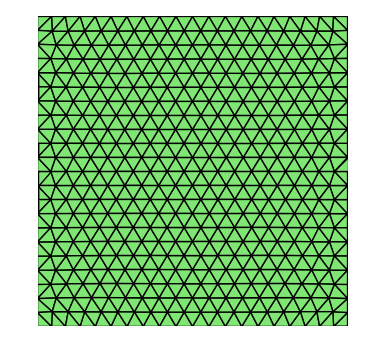

In [6]:
from fealpy.mesh.simple_mesh_generator import unitsquaredomainmesh
mesh = unitsquaredomainmesh(0.05, meshtype='tri')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.show()

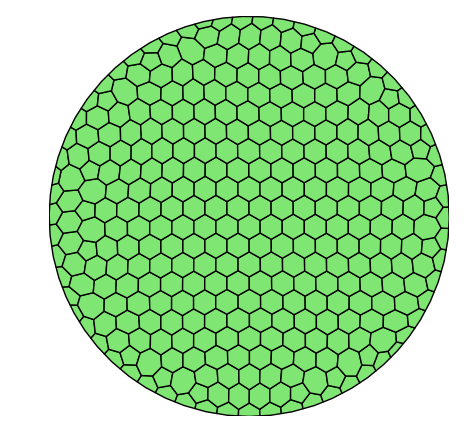

In [9]:
from fealpy.mesh.simple_mesh_generator import unitcircledomainmesh
mesh = unitcircledomainmesh(0.1, meshtype='polygon')
fig = plt.figure()
axes = fig.gca()
mesh.add_plot(axes)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.savefig('/home/why/cpolygonmesh.pdf')
plt.show()

In [ ]:
import numpy as np
from fealpy.mesh.simple_mesh_generator import triangle
box = [0, 1, 0, 1]
h = 0.02
tmesh = triangle(box, h)
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.savefig('/home/why/squaremeshdelaunay0.02.pdf')
plt.show()

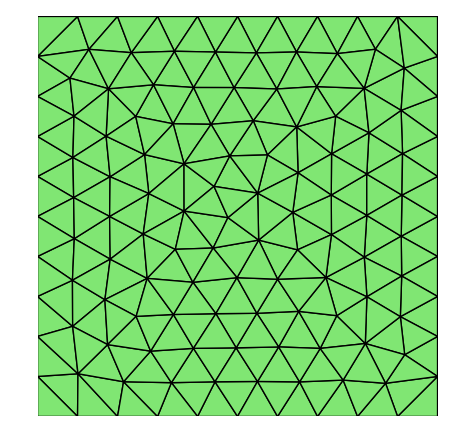

In [8]:
import numpy as np
from fealpy.mesh.meshio import load_mat_mesh
tmesh = load_mat_mesh('/home/why/fealpy/data/square1.mat')
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.savefig('/home/why/squaremeshcvt.pdf')
plt.show()

{'segment_markers': array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [6],
       [6]], dtype=int32), 'holes': array([[  0., -50.],
       [-50.,  50.],
       [ 50.,  50.]]), 'vertices': array([[  80.,    0.],
       [ 100.,   50.],
       [   0.,  100.],
       [-100.,   50.],
       [ -80.,    0.],
       [-100.,  -50.],
       [   0., -100.],
       [ 100.,  -50.],
       [   0.,  -90.],
       [  80.,  -50.],
       [   0.,  -10.],
       [ -80.,  -50.],
       [ -70.,   50.],
       [ -60.,   30.],
       [ -10.,   55.],
       [ -40.,   55.],
       [  70.,   50.],
       [  60.,   30.],
       [  10.,   55.],
       [  40.,   55.],
       [ -10.,   25.],
       [ -20.,  -10.],
       [  10.,   25.],
       [  20.,  -10.],
       [ -50.,    0.],
       [  50.,    0.]]), 'segments': arr

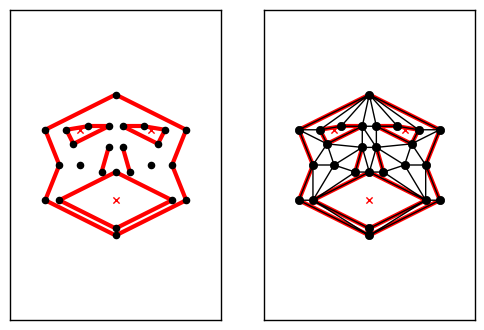

In [9]:
import triangle
import triangle.plot as plot
import matplotlib.pyplot as plt

face = triangle.get_data('face')
print(face)
print(face['segment_markers'].shape)
print(face['segments'].shape)
ax1 = plt.subplot(121, aspect='equal')
plot.plot(ax1, **face)

t = triangle.triangulate(face, 'p')

ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
triangle.plot.plot(ax2, **t)

plt.show()

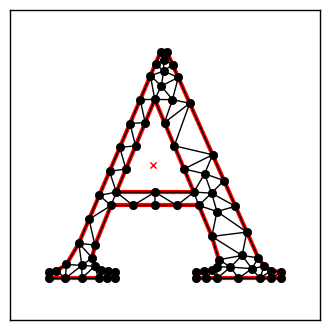

{'holes': array([[ 0.47, -0.5 ]]), 'vertices': array([[ 0.2   , -0.7764],
       [ 0.22  , -0.7732],
       [ 0.2456, -0.7564],
       [ 0.2776, -0.702 ],
       [ 0.4888, -0.2076],
       [ 0.5048, -0.2076],
       [ 0.7408, -0.7396],
       [ 0.756 , -0.7612],
       [ 0.7744, -0.7724],
       [ 0.8   , -0.7764],
       [ 0.8   , -0.7924],
       [ 0.5792, -0.7924],
       [ 0.5792, -0.7764],
       [ 0.6216, -0.7716],
       [ 0.6336, -0.7628],
       [ 0.6392, -0.7444],
       [ 0.6208, -0.6844],
       [ 0.5872, -0.6044],
       [ 0.3608, -0.6044],
       [ 0.3192, -0.7068],
       [ 0.312 , -0.7396],
       [ 0.3184, -0.7612],
       [ 0.3344, -0.7716],
       [ 0.3712, -0.7764],
       [ 0.3712, -0.7924],
       [ 0.3744, -0.57  ],
       [ 0.5744, -0.57  ],
       [ 0.4736, -0.3308],
       [ 0.2   , -0.7924]]), 'segments': array([[28,  0],
       [ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
   

In [10]:
import triangle
import triangle.plot as plot
import matplotlib.pyplot as plt

A = triangle.get_data('A')
t = triangle.triangulate(A, 'pq30')
plot.plot(plt.axes(), **t)
plt.show()
print(A)

In [ ]:
import triangle
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

from fealpy.mesh.TriangleMesh import TriangleMesh
%matplotlib inline

verts = np.array([
        [-4, -4], [0, -4], [4, -4], [4, 0], 
        [4, 4], [0, 4], [-4, 4], [-4, 0],
        [0, -3], [3, 0], [0, 3], [-3, 0],
        [0, -2.39], [0, 2.39]
    ], dtype=np.float)
segs = np.array([
        [0, 1], [1, 2], [2, 3], [3, 4],[4, 5],[5, 6], [6, 7], [7, 0],
        [1, 8], [3, 9], [5, 10], [7, 11], [8, 9], [9, 10], [10, 11], 
        [11,8], [12,11], [11, 13], [13, 9], [9, 12], [10, 13], [8, 12]
    ], dtype=np.int)
holes = np.array([[0, 0]], dtype=np.float)

plsg = {'segments':segs, 'vertices':verts, 'holes':holes}
t = triangle.triangulate(plsg, 'pq30a0.1')
tmesh = TriangleMesh(t['vertices'], t['triangles'])
tmesh.uniform_refine(2)
fig = plt.figure()
axes = fig.gca()
tmesh.add_plot(axes)
data = {
        'node':tmesh.point, 
        'elem':tmesh.ds.cell + 1
        }
sio.matlab.savemat('trimesh', data)
plt.show()

In [9]:
1/16

0.0625

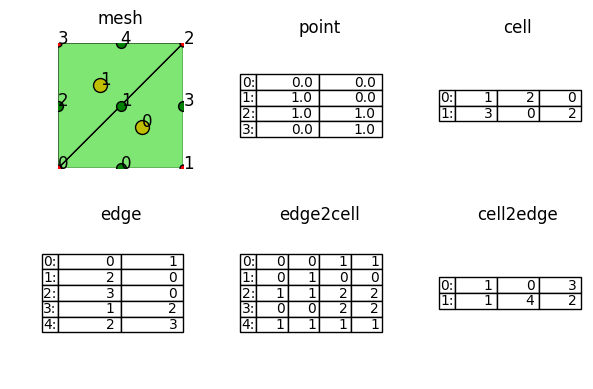

In [1]:
import numpy as np
from fealpy.mesh.TriangleMesh import TriangleMesh
import matplotlib.pyplot as plt 
%matplotlib inline
point = np.array(
    [(0.0, 0.0),
     (1.0, 0.0),
     (1.0, 1.0),
     (0.0, 1.0)], dtype=np.float)
cell = np.array([
        (1, 2, 0), 
        (3, 0, 2)], dtype=np.int)
tmesh = TriangleMesh(point, cell) # 三角形网格实例
fig, axes = plt.subplots(2, 3)
tmesh.add_plot(axes[0, 0])
tmesh.find_point(axes[0, 0], showindex=True, markersize=25, fontsize=12)
tmesh.find_edge(axes[0, 0], showindex=True, markersize=50, fontsize=12)
tmesh.find_cell(axes[0, 0], showindex=True, markersize=100, fontsize=12)
axes[0, 0].set_title('mesh', y=1.1)

for ax in axes.reshape(-1)[1:]:
    ax.axis('tight')
    ax.axis('off')
axes[0, 1].table(cellText=point, rowLabels=['0:', '1:', '2:', '3:'], loc='center')
axes[0, 1].set_title('point')
axes[0, 2].table(cellText=cell, rowLabels=['0:', '1:'], loc='center')
axes[0, 2].set_title('cell')
axes[1, 0].table(cellText=tmesh.ds.edge, rowLabels=['0:', '1:', '2:', '3:', '4:'],  loc='center')
axes[1, 0].set_title('edge')
axes[1, 1].table(cellText=tmesh.ds.edge2cell, rowLabels=['0:', '1:', '2:', '3:', '4:'],  loc='center')
axes[1, 1].set_title('edge2cell')
axes[1, 2].table(cellText=tmesh.ds.cell_to_edge(), rowLabels=['0:', '1:'],  loc='center')
axes[1, 2].set_title('cell2edge')
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.savefig('/home/why/edgedata1.pdf')
plt.show()

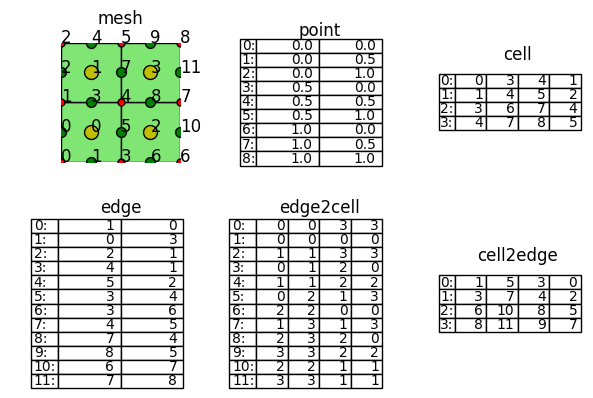

In [9]:
-

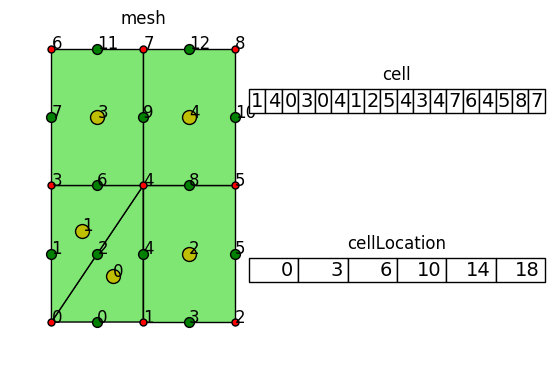

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
%matplotlib inline
from fealpy.mesh.PolygonMesh import PolygonMesh

def labels(n):
    r = [str(i)+':' for i in range(n)]
    return r

point = np.array([
    [0, 0],
    [1, 0],
    [2, 0],
    [0, 1],
    [1, 1],
    [2, 1],
    [0, 2],
    [1, 2],
    [2, 2]], dtype=np.float)
cell = np.array([1, 4, 0, 3, 0, 4, 1, 2, 5, 4, 3, 4, 7, 6, 4, 5, 8, 7], dtype=np.int)
cellLocation = np.array([0, 3, 6, 10, 14, 18], dtype=np.int)

mesh = PolygonMesh(point, cell, cellLocation)
point = mesh.point
cell = mesh.ds.cell
cellLocation = mesh.ds.cellLocation
edge = mesh.ds.edge
cell2edge = mesh.ds.cell_to_edge()
edge2cell = mesh.ds.edge_to_cell()

gs = gridspec.GridSpec(2, 2)
axes = [plt.subplot(gs[:, 0]), plt.subplot(gs[0, 1]), plt.subplot(gs[1, 1])]
mesh.add_plot(axes[0])
mesh.find_point(axes[0], showindex=True, markersize=25, fontsize=12)
mesh.find_edge(axes[0], showindex=True, markersize=50, fontsize=12)
mesh.find_cell(axes[0], showindex=True, markersize=100, fontsize=12)
axes[0].set_title('mesh', y=1)

for ax in axes:
    ax.axis('tight')
    ax.axis('off')
table = axes[1].table(cellText=cell.reshape(1, -1),  loc='center')
axes[1].set_title('cell', y=0.6)
table.set_fontsize(14)
table.scale(1.4, 1.4)
table = axes[2].table(cellText=cellLocation.reshape(1, -1), loc='center')
axes[2].set_title('cellLocation', y=0.6)
table.set_fontsize(14)
table.scale(1.4, 1.4)
#plt.tight_layout(pad=1, w_pad=0.5, h_pad=1)
plt.savefig('/home/why/edgedata1.pdf')
plt.show()

Point:
 [[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0. -1.]]
Cell:
 [[0 1 2 3]
 [0 2 1 4]]
Edge:
 [[0 1]
 [0 2]
 [0 3]
 [0 4]
 [1 2]
 [1 3]
 [1 4]
 [2 3]
 [2 4]]
Face:
 [[0 2 1]
 [0 1 3]
 [0 4 1]
 [0 3 2]
 [0 2 4]
 [1 2 3]
 [2 1 4]]
Face2cell:
 [[0 1 3 3]
 [0 0 2 2]
 [1 1 1 1]
 [0 0 1 1]
 [1 1 2 2]
 [0 0 0 0]
 [1 1 0 0]]
Cell2face:
 [[5 3 1 0]
 [6 2 4 0]]


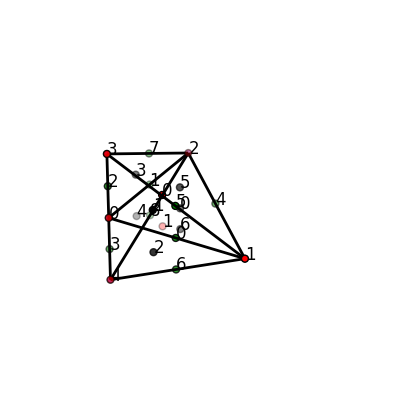

In [6]:
import numpy as np
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl

from fealpy.mesh.TetrahedronMesh import TetrahedronMesh

ax1 = a3.Axes3D(pl.figure())

point = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0,-1]], dtype=np.float)

cell = np.array([
    [0, 1, 2, 3],
    [0, 2, 1, 4]], dtype=np.int)

mesh = TetrahedronMesh(point, cell)
mesh.add_plot(ax1)
mesh.find_point(ax1, showindex=True, markersize=25, fontsize=12)
mesh.find_edge(ax1, showindex=True, markersize=25, fontsize=12)
mesh.find_face(ax1, showindex=True, markersize=25, fontsize=12)
mesh.find_cell(ax1, showindex=True, markersize=25, fontsize=12)
mesh.print()
pl.show()



max: 90.0
min: 45.0
max: 90.0
min: 45.0
max: 125.264389683
min: 35.2643896828


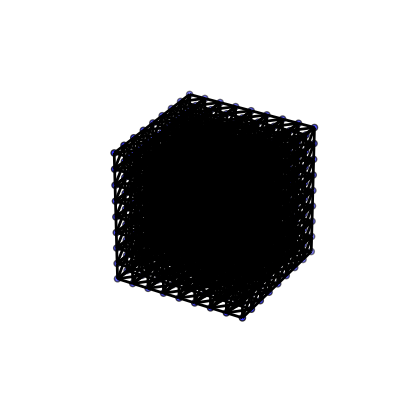

In [13]:
import numpy as np
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl

from fealpy.mesh.TetrahedronMesh import TetrahedronMesh
from fealpy.mesh.vtkMeshIO import write_vtk_mesh




#point = np.array([
#    [0, 0, 0],
#    [1, 0, 0],
#    [0, 1, 0],
#    [0, 0, 1]], dtype=np.float)
#
#cell = np.array([
#    [0, 1, 2, 3]], dtype=np.int)

point = np.array([
    [-1,-1,-1],
    [ 1,-1,-1], 
    [ 1, 1,-1],
    [-1, 1,-1],
    [-1,-1, 1],
    [ 1,-1, 1], 
    [ 1, 1, 1],
    [-1, 1, 1]], dtype=np.float) 

cell = np.array([
    [0,1,2,6],
    [0,5,1,6],
    [0,4,5,6],
    [0,7,4,6],
    [0,3,7,6],
    [0,2,3,6]], dtype=np.int)

mesh = TetrahedronMesh(point, cell)
for i in range(3):
    angle = mesh.dihedral_angle()
    print("max:", np.max(angle))
    print("min:", np.min(angle))
    mesh.uniform_refine()
    
write_vtk_mesh(mesh, '/home/why/test.vtk')

ax0 = a3.Axes3D(pl.figure())
mesh.add_plot(ax0)
pl.show()
